In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("tvmarketing.csv")

In [3]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

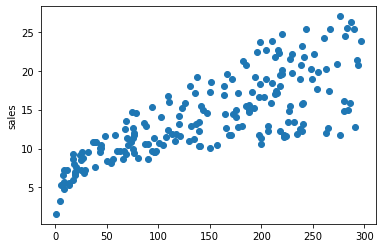

In [8]:
plt.scatter(df['TV'], df['Sales']);
plt.ylabel("sales")
plt.show()

In [9]:
df.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [12]:
df.shape

(200, 2)

In [13]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


#### Visualisation

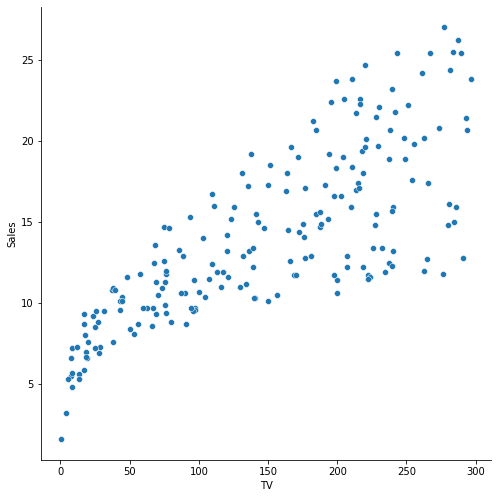

In [20]:
sns.pairplot(df, x_vars=['TV'], y_vars=['Sales'], height=7, kind='scatter')

#### Simple Linear Regression

y = c+m*TV



In [21]:
X = df['TV']

X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [22]:
y = df['Sales']

y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

#### Splitting into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [26]:
type(X_train)

pandas.core.series.Series

In [28]:
print(X_train.shape)

(140,)


In [29]:
print(y_train.shape)

(140,)


In [30]:
import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

/var/folders/8f/18ff93354yb0zkbf6wg6qn7w0000gn/T/ipykernel_1702/4166564151.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:, np.newaxis]
/var/folders/8f/18ff93354yb0zkbf6wg6qn7w0000gn/T/ipykernel_1702/4166564151.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:, np.newaxis]


In [31]:
X_train.shape

(140, 1)

### Perform Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [34]:
print(lr.intercept_)
print(lr.coef_)

6.98966585741168
[0.04649736]


y = 6.989 + 0.0464 x TV

In [35]:
y_pred = lr.predict(X_test)

In [36]:
type(y_pred)

numpy.ndarray

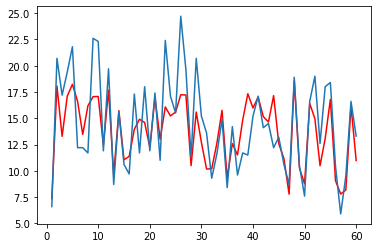

In [43]:
n = len(y_pred)
c = [i for i in range(1,n+1)]

plt.plot(c,y_pred, color='red')
plt.plot(c,y_test)

plt.show()

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
mse = mean_squared_error(y_test, y_pred)

In [50]:
r_squared= r2_score(y_test, y_pred)

In [51]:
print(mse)

7.975798532854851


In [52]:
print(r_squared)

0.5942987267783302


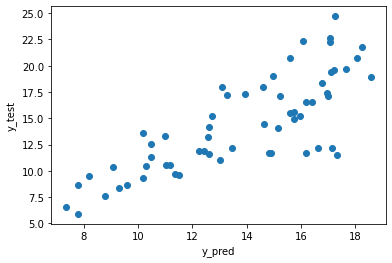

In [54]:
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

#### Residual square Error

RSE = sqrt(RSS/df)

df = n-2 where n = # of data points